In [6517]:
#!pip install fbprophet
#!pip install pystan
#Download Microsoft Visual C++ 2017 Community to run Prophet

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [2]:
df = pd.read_csv('Dataset.csv')
#df['y'] = np.log(df['y'])
df.tail()

,ds,y
31,8/31/2017,18825
32,9/30/2017,33857
33,10/31/2017,20334
34,11/30/2017,10629
35,12/31/2017,22459


In [3]:
df.shape

(36, 2)

In [246]:
#m = Prophet(weekly_seasonality=, daily_seasonality=False)
#m.add_seasonality(name='yearly', period=30.5, fourier_order=5)
#forecast = m.fit(df).predict(future)
#m.plot_components(forecast);

INFO:fbprophet.forecaster:Found custom seasonality named "yearly", disabling built-in yearly seasonality.
C:\Users\my\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [4]:
#m = Prophet(changepoints=['2017-03-31']
m = Prophet()
m.fit(df);

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\my\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [5]:
future = m.make_future_dataframe(periods=3, freq='M')
future.tail()

,ds
34,2017-11-30
35,2017-12-31
36,2018-01-31
37,2018-02-28
38,2018-03-31


In [6]:
forecast = m.predict(future)
fcst = forecast[['ds','yhat']].tail(39)
print(fcst)

           ds          yhat
0  2015-01-31  35163.449301
1  2015-02-28  45493.158637
2  2015-03-31  55186.786971
3  2015-04-30  39218.057799
4  2015-05-31  57118.276026
5  2015-06-30  56395.228322
6  2015-07-31  38155.445902
7  2015-08-31  30449.543423
8  2015-09-30  45522.107738
9  2015-10-31  42568.901651
10 2015-11-30  28561.292970
11 2015-12-31  31595.860753
12 2016-01-31  33124.079856
13 2016-02-29  43422.077650
14 2016-03-31  53431.144165
15 2016-04-30  37259.247350
16 2016-05-31  55088.991912
17 2016-06-30  54270.345779
18 2016-07-31  36106.844576
19 2016-08-31  28037.545485
20 2016-09-30  43207.400521
21 2016-10-31  40917.230028
22 2016-11-30  26582.544300
23 2016-12-31  29499.085171
24 2017-01-31  31080.821664
25 2017-02-28  41382.637187
26 2017-03-31  51287.830564
27 2017-04-30  35168.142241
28 2017-05-31  53029.232333
29 2017-06-30  52241.176141
30 2017-07-31  34042.410186
31 2017-08-31  26090.663714
32 2017-09-30  41241.576706
33 2017-10-31  38727.274286
34 2017-11-30  24489

In [242]:
#Export the fitted and forecast values.

fcst.to_csv("Output.csv")

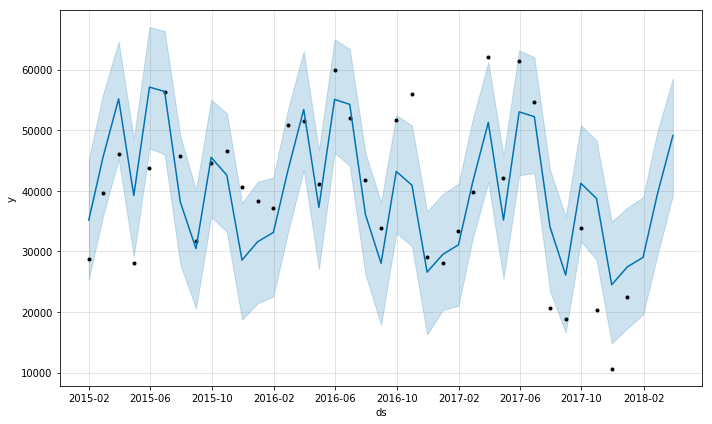

In [7]:
m.plot(forecast);

In [8]:
def mean_absolute_percentage_error(act, predictions):
    mape = np.mean(np.abs((act - predictions) / act)) * 100
    return mape

In [9]:
#Check for mape for the 2017-12-31

print(mean_absolute_percentage_error(22459, 27448))

22.21381183489915
